In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [ ]:
df1 = pd.read_csv("flat_house_v3.csv")

In [ ]:
df2 = pd.read_csv("flats_houses_v1.csv")

In [ ]:
df3 = df2[["PROP_ID","PROP_NAME"]]
df3.drop_duplicates(inplace = True)

<ipython-input-7-b47eb94f8498>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop_duplicates(inplace = True)


In [ ]:
df = pd.merge(df1, df3, on="PROP_ID", how = "inner")

In [ ]:
df.sample(5)

,PROP_ID,PROPERTY_TYPE,CITY_NAME,LOCALITY_NAME,OWNTYPE,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,FURNISH,FACING,FLOOR_NUM,TOTAL_FLOOR,LATITUDE,LONGITUDE,AVAILABILITY,AVG_PRICE,PRICE_SQFT,AVG_PRICE_CR,AREA_SQFT,CALCULATED_AREA_SQFT,AGE_POSSESSION,AMENITIES_CLUSTER,LUXURY_SCORE,PROP_NAME
2569,E70947442,flat,Dwarka Delhi,Sector 18A Dwarka,Freehold,2.0,2,3.0,Semifurnished,East,1.0,10.0,28.589232,77.035353,Ready to move,17500000,11666,1.75,1500.085719,1500.085719,Moderately old,Moderate,37,Manokamna Apartment
4842,A60476292,flat,North Delhi,Rana Partap Bagh,Freehold,3.0,3,2.0,Furnished,NaN,2.0,4.0,28.686276,77.190949,Ready to move,15000000,9375,1.50,1600.000000,1650.000000,Moderately old,Basic,0,Rana pratap bagh
2468,C71367106,flat,Dwarka Delhi,Sector 6 Dwarka,Freehold,3.0,2,3.0,Semifurnished,South-East,5.0,11.0,28.592840,77.063640,Ready to move,20500000,10789,2.05,1900.083418,1900.083418,Moderately old,Moderate,37,CGHS Sanmati Kunj
1210,Q71195134,flat,West Delhi,Moti Nagar,Freehold,3.0,3,4.0,Unfurnished,West,21.0,26.0,28.667847,77.136742,Ready to move,29000004,17575,2.90,1650.071351,1650.071351,Moderately old,Moderate,44,DLF Capital Greens 1 and 2
2544,L58698238,flat,Dwarka Delhi,Sector 22 Dwarka,Freehold,3.0,3,2.0,Semifurnished,North-East,2.0,9.0,28.561272,77.057426,Ready to move,19000000,13571,1.90,1400.044212,1500.000000,Old Property,High-End,147,CGHS Himalayan Residency


# Property Type

<Axes: >

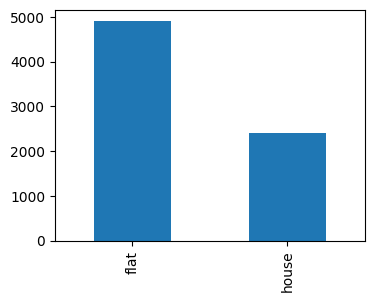

In [ ]:
df["PROPERTY_TYPE"].value_counts().plot(kind = "bar", figsize = (4,3))

# City Name

In [ ]:
df["CITY_NAME"].value_counts()

Dwarka Delhi     2333
West Delhi       1460
North Delhi      1254
South Delhi      1241
East Delhi        903
Central Delhi     135
Delhi               1
Name: CITY_NAME, dtype: int64

In [ ]:
df.loc[6018, "CITY_NAME"] = "West Delhi"

<Axes: >

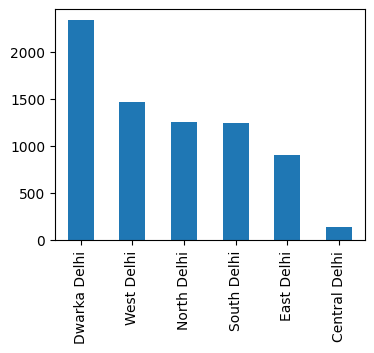

In [ ]:
df["CITY_NAME"].value_counts().plot(kind = "bar", figsize = (4,3))

# Locality Name

<Axes: >

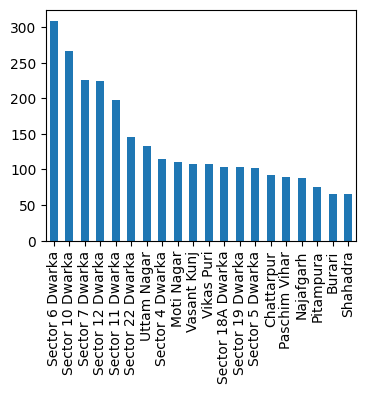

In [ ]:
df["LOCALITY_NAME"].value_counts().head(20).plot(kind = "bar", figsize = (4,3))

In [ ]:
locality_counts = df["LOCALITY_NAME"].value_counts()

# Frequency distribution for societies
frequency_bins = {
    "Very High (>100)": (locality_counts > 100).sum(),
    "High (50-100)": ((locality_counts >= 50) & (locality_counts <= 100)).sum(),
    "Average (10-49)": ((locality_counts > 10) & (locality_counts < 50)).sum(),
    "Low (2-9)": ((locality_counts > 1) & (locality_counts < 10)).sum(),
    "Very Low (1)": (locality_counts == 1).sum()
}

frequency_bins

{'Very High (>100)': 14,
 'High (50-100)': 15,
 'Average (10-49)': 88,
 'Low (2-9)': 429,
 'Very Low (1)': 552}

# Property Name

In [ ]:
df.reset_index(inplace = True)

In [ ]:
df.drop(columns = ["index"], inplace = True)

In [ ]:
index_val = df[(df["PROPERTY_TYPE"] == "house")].index

In [ ]:
df.loc[index_val, "PROP_NAME"] = "independent"

In [ ]:
df["PROP_NAME"].value_counts()

independent                                          2412
DDA Flats                                              82
Antriksh Rashi Apartments                              64
CGHS Sunny Valley                                      60
CGHS Diamond Square Apartments                         53
DLF Capital Greens 1 and 2                             51
DDA Pink Apartments                                    45
Fakhruddin Memorial CGHS                               45
Manokamna Apartment                                    43
DDA LIG Flats                                          42
DDA Metro View Apartments                              41
Residential Apartment                                  39
CGHS NPSC Society                                      36
CGHS Gokul Apartment                                   36
Madhur Jeevan Apartment                                35
CGHS Sanmati Kunj                                      32
Sargodha Apartments                                    32
CGHS Aakash Ga

In [ ]:
df.shape

(7327, 24)

In [ ]:
df[df["PROP_NAME"] != 'independent']["PROP_NAME"].value_counts(normalize = True).cumsum().head(120)

In [ ]:
prop_counts = df["PROP_NAME"].value_counts()

# Frequency distribution for societies
frequency_bins = {
    "Very High (>100)": (prop_counts > 100).sum(),
    "High (50-100)": ((prop_counts >= 50) & (prop_counts <= 100)).sum(),
    "Average (10-49)": ((prop_counts > 10) & (prop_counts < 50)).sum(),
    "Low (2-9)": ((prop_counts > 1) & (prop_counts < 10)).sum(),
    "Very Low (1)": (prop_counts == 1).sum()
}

frequency_bins

{'Very High (>100)': 1,
 'High (50-100)': 5,
 'Average (10-49)': 94,
 'Low (2-9)': 449,
 'Very Low (1)': 1116}

<Axes: >

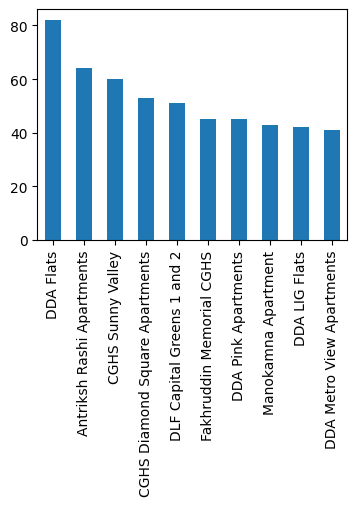

In [ ]:
# Delhi top 10 properties (societies)
df[df["PROP_NAME"] != 'independent']["PROP_NAME"].value_counts().head(10).plot(kind = "bar", figsize = (4,3))

independent house -> (2412) value counts

1671 prop_name makes -> (4915) flats

120 prop_name makes -> (50 % -> 2457) of flats

In [ ]:
df[df["PROP_NAME"].isna()]

,PROP_ID,PROPERTY_TYPE,CITY_NAME,LOCALITY_NAME,OWNTYPE,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,FURNISH,FACING,FLOOR_NUM,TOTAL_FLOOR,LATITUDE,LONGITUDE,AVAILABILITY,AVG_PRICE,PRICE_SQFT,AVG_PRICE_CR,AREA_SQFT,CALCULATED_AREA_SQFT,AGE_POSSESSION,AMENITIES_CLUSTER,LUXURY_SCORE,PROP_NAME
3844,R4712603,flat,South Delhi,Jangpura,Freehold,3.0,3,NaN,NaN,NaN,NaN,NaN,28.578454,77.262726,Ready to move,21500000,11944,2.15,1800.066979,1800.0,Moderately old,Basic,11,NaN
3987,K8800825,flat,East Delhi,Dilshad Garden,Freehold,1.0,1,NaN,NaN,NaN,NaN,NaN,28.681681,77.318084,Ready to move,3400000,7556,0.34,449.973531,450.0,Relatively New,Basic,0,NaN
4195,D7304359,flat,North Delhi,Rohini,Freehold,2.0,1,2.0,Semifurnished,East,2.0,NaN,28.736657,77.090893,Ready to move,9900000,9340,0.99,1059.957173,1060.0,Old Property,Basic,10,NaN


In [ ]:
df.columns

Index(['PROP_ID', 'PROPERTY_TYPE', 'CITY_NAME', 'LOCALITY_NAME', 'OWNTYPE',
       'BEDROOM_NUM', 'BATHROOM_NUM', 'BALCONY_NUM', 'BUILTUP_SQFT',
       'CARPET_SQFT', 'SUPERBUILTUP_SQFT', 'FURNISH', 'FACING', 'FLOOR_NUM',
       'TOTAL_FLOOR', 'LATITUDE', 'LONGITUDE', 'AVAILABILITY', 'AVG_PRICE',
       'PRICE_SQFT', 'AVG_PRICE_CR', 'AREA_SQFT', 'AGE_POSSESSION',
       'AMENITIES_CLUSTER', 'LUXURY_SCORE', 'PROP_NAME'],
      dtype='object')

# OwnType

<Axes: >

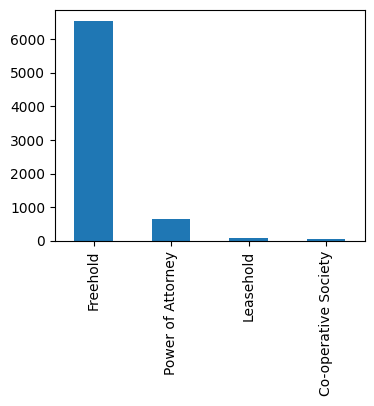

In [ ]:
df["OWNTYPE"].value_counts().plot(kind = "bar", figsize = (4,3))

# Facing

<Axes: >

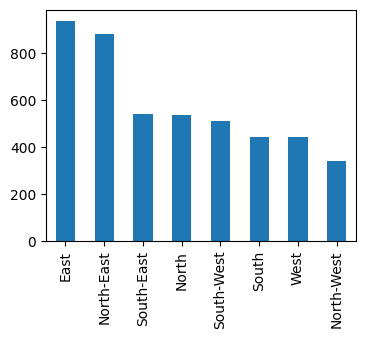

In [ ]:
df["FACING"].value_counts().plot(kind = "bar", figsize = (4,3))

In [ ]:
df["FACING"].isnull().sum()

2704

In [ ]:
df["FACING"].fillna("NA", inplace = True)

# Age Posession

In [ ]:
df["AGE_POSSESSION"].value_counts()

Old Property      2633
Moderately old    2161
Relatively New    1316
New Property      1081
Not Mentioned      136
Name: AGE_POSSESSION, dtype: int64

In [ ]:
index_val = df[df["AGE_POSSESSION"] == "Not Mentioned"].index

In [ ]:
df.loc[index_val, "AGE_POSSESSION"]  = "Under Construction"

<Axes: >

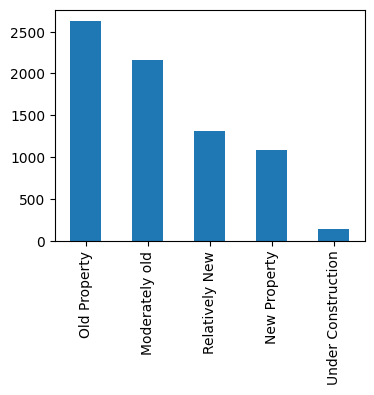

In [ ]:
df["AGE_POSSESSION"].value_counts().plot(kind = 'bar', figsize = (4,3))

# Furnish

<Axes: >

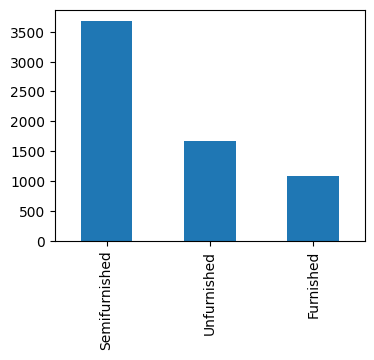

In [ ]:
df["FURNISH"].value_counts().plot(kind = 'bar', figsize = (4,3))

# Amenities

<Axes: >

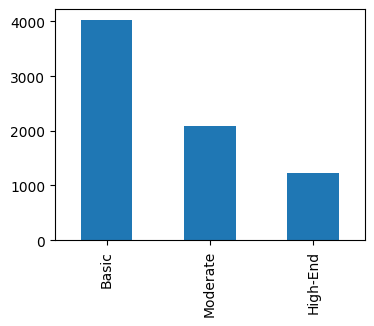

In [ ]:
df["AMENITIES_CLUSTER"].value_counts().plot(kind = 'bar' , figsize = (4,3))

# Price

In [ ]:
df['AVG_PRICE_CR'].isnull().sum()

0

In [ ]:
df['AVG_PRICE_CR'].describe()

count    7327.000000
mean        2.943877
std         9.441767
min         0.020000
25%         0.620000
50%         1.450000
75%         2.420000
max       275.000000
Name: AVG_PRICE_CR, dtype: float64

<Axes: xlabel='AVG_PRICE_CR', ylabel='Count'>

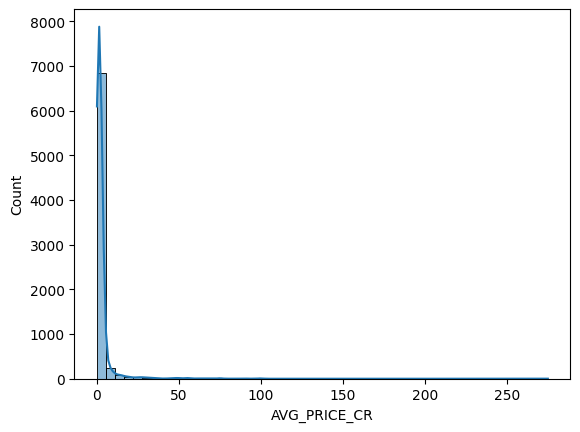

In [ ]:
sns.histplot(df['AVG_PRICE_CR'], kde=True, bins = 50)

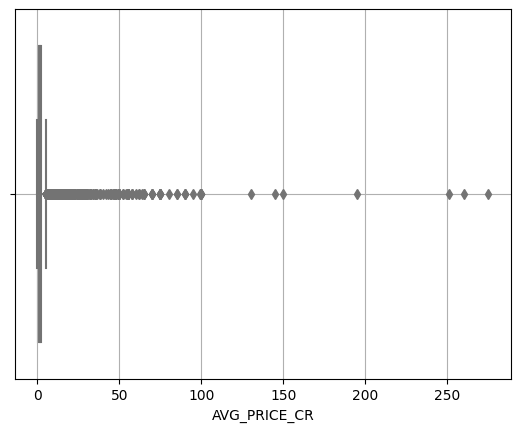

In [ ]:
sns.boxplot(x = df['AVG_PRICE_CR'], color = "lightgreen")
plt.grid()



*   Descriptive Statistics:
    * There are no missing values.
    * Mean Price: The average price of flats is appriximately equal to 2.94 crores
    * Median Price (50th percentile): 1.45 crores (nearly half)
    * Standard Deviation is 9.44, indicating very high variability in the price
    * Price Range: (0.02 Crore to 275 Crore)
    * 75th Percentile: 2.42 Crores IQR: 1.8 Crores

* Visualizations
    * histogram is right skewed and box plot is showing that there are so many potential outliers


In [ ]:
skewness = df['AVG_PRICE_CR'].skew()
kurtosis = df['AVG_PRICE_CR'].kurt()
print(skewness, kurtosis)

14.17660489761619 298.4482875339982


**Skewness**: The Price distribution has skewness of 14.17. This means that the distribution tail is skewed to the right, which aligns with the observation of histogram where most properties have prices on the lower end with a very few high priced properties.

**kurtosis**: The Kurtosis is 298.44. A kurtosis value greater that 3 indiactes a distribution with heavier tails and more outliers compared to normal distribution.
298.44 >> 3

In [ ]:
# Quantiles Analysis
quantiles = df['AVG_PRICE_CR'].quantile([0.01, 0.05, 0.95, 0.99,0.995])
quantiles

0.010     0.15
0.050     0.24
0.950     8.00
0.990    39.48
0.995    58.74
Name: AVG_PRICE_CR, dtype: float64

Quantile Analysis:


*   1% Quantile: Only 1% Properties are priced below 15 lakhs
*   5% Quantile: 5% properties are below 24 lakhs
*   95% Quantile: 95% properties are below 8 crores
*   99% Quantile: 99% properties are below 39 crores


In [ ]:
Q1 = df['AVG_PRICE_CR'].describe()['25%']
Q3 = df['AVG_PRICE_CR'].describe()['75%']
IQR = Q3 - Q1

print(IQR)
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(lower_bound, upper_bound)

1.7999999999999998
-2.0799999999999996 5.119999999999999


In [ ]:
outliers = df[(df['AVG_PRICE_CR'] < lower_bound) | (df['AVG_PRICE_CR'] > upper_bound)]
outliers.shape

(525, 24)

In [ ]:
outliers["AVG_PRICE_CR"].describe()

count    525.000000
mean      21.858629
std       29.094740
min        5.200000
25%        7.500000
50%       11.500000
75%       24.000000
max      275.000000
Name: AVG_PRICE_CR, dtype: float64

Outiler Analysis (using IQR method):



*   Based on IQR method, thre are 525 properties considered as outliers
*   These Outliers have an average price of approximately 21.85 crores
*   The range of these outliers are from 5.2 to 275 crores



In [ ]:
# df.to_csv("flat_house_v4.csv", index = False)

In [ ]:
# df = pd.read_csv("flat_house_v4.csv")

<Axes: >

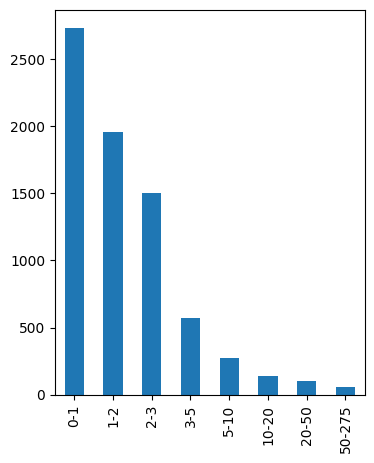

In [ ]:
bins = [0,1,2,3,5,10,20,50,275]
bins_labels = ["0-1","1-2","2-3","3-5","5-10","10-20","20-50","50-275"]
pd.cut(df["AVG_PRICE_CR"], bins = bins, labels = bins_labels, right = False).value_counts().sort_index().plot(kind = "bar", figsize = (4,5))

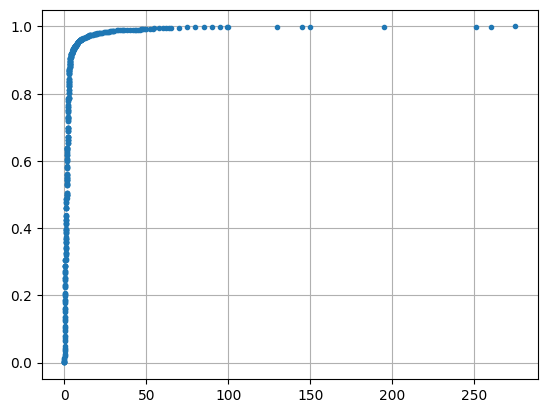

In [ ]:
# An ECDF represents the proportion or count of observations falling below each unique value in a dataset.
ecdf = df["AVG_PRICE_CR"].value_counts().sort_index().cumsum() / len(df["AVG_PRICE_CR"])
plt.plot(ecdf.index, ecdf, marker = '.', linestyle = 'none')
plt.grid()

In [ ]:
from scipy import stats

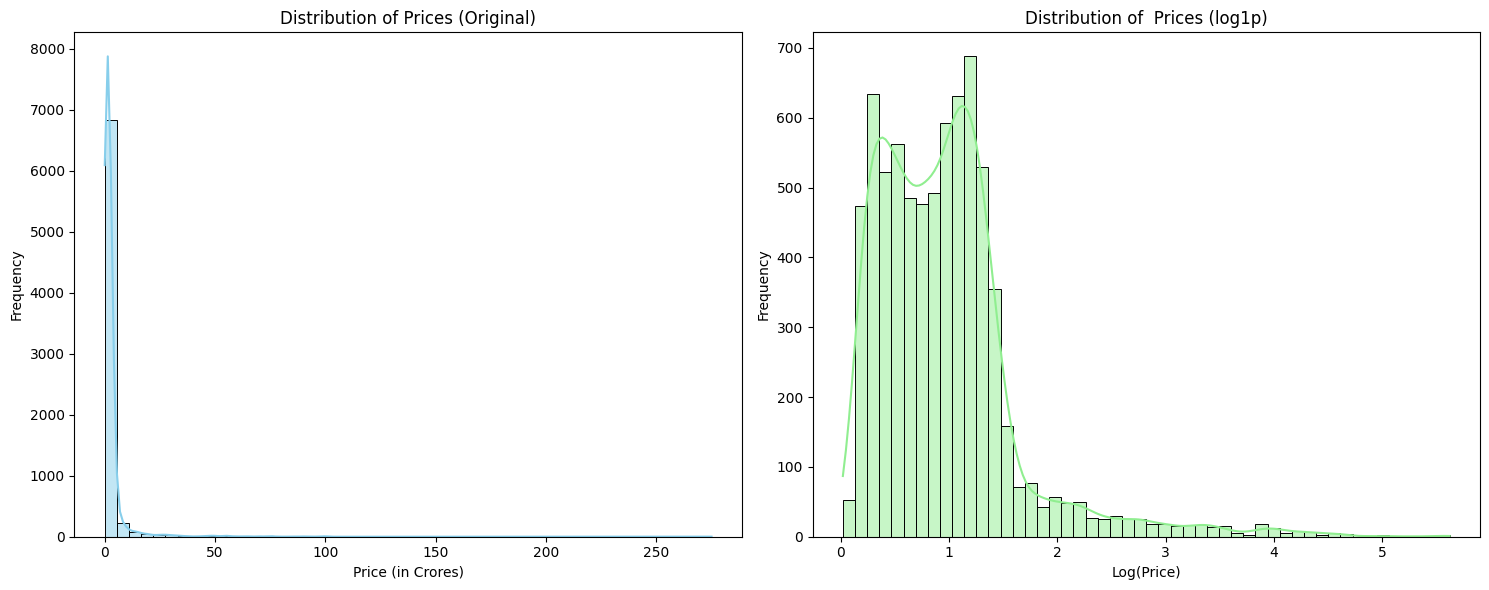

In [ ]:
plt.figure(figsize = (15,6))

# Original Distribution Plot
plt.subplot(1,2,1)
sns.histplot(df["AVG_PRICE_CR"], kde = True, bins = 50, color = 'skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log Transformation
plt.subplot(1,2,2)
sns.histplot(np.log1p(df['AVG_PRICE_CR']), kde = True, bins = 50, color = "lightgreen")
plt.title('Distribution of  Prices (log1p)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
skewness = np.log1p(df["AVG_PRICE_CR"]).skew()
kurtosis = np.log1p(df["AVG_PRICE_CR"]).kurt()
print(skewness, kurtosis)

2.0621934929020957 6.914286263167607


Skewness and kurtosis have decreased but still our distribution is not normally distributed. There is still some level of right skewness.

<Axes: >

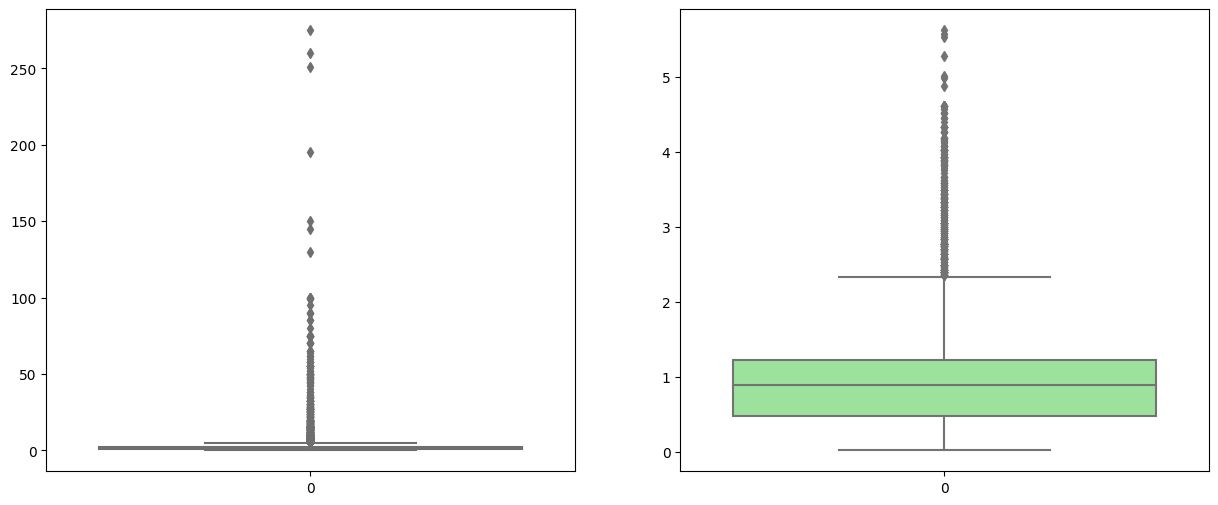

In [ ]:
plt.figure(figsize=(15, 6))

# Box plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['AVG_PRICE_CR'], color='skyblue')

# Box plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['AVG_PRICE_CR']), color='lightgreen')


# Price Per SQFT

In [ ]:
pd.set_option('display.float_format', '{:.0f}'.format)

In [ ]:
df["PRICE_SQFT"].describe()

count      7327
mean      21574
std       47354
min           3
25%        8670
50%       11666
75%       16290
max     1714285
Name: PRICE_SQFT, dtype: float64

In [ ]:
df[df["PRICE_SQFT"] < 1000]

,PROP_ID,PROPERTY_TYPE,CITY_NAME,LOCALITY_NAME,OWNTYPE,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,FURNISH,FACING,FLOOR_NUM,TOTAL_FLOOR,LATITUDE,LONGITUDE,AVAILABILITY,AVG_PRICE,PRICE_SQFT,AVG_PRICE_CR,AREA_SQFT,CALCULATED_AREA_SQFT,AGE_POSSESSION,AMENITIES_CLUSTER,LUXURY_SCORE,PROP_NAME
2838,Y71379306,flat,South Delhi,Chattarpur Enclave Phase 2,Power of Attorney,3,3,2,Semifurnished,NA,1,8,29,77,Ready to move,13000000,928,1,14009,15556,Relatively New,Basic,14,Apoorva Apartment
2939,C71286646,flat,Dwarka Delhi,Raj Nagar,Freehold,1,1,1,Semifurnished,NA,0,4,29,77,Ready to move,1600000,598,0,2676,2972,Relatively New,Basic,0,Satish Homes 2
3163,E65811822,flat,North Delhi,Narela,Freehold,3,2,2,Semifurnished,North-East,2,4,29,77,Ready to move,2700000,353,0,7649,7650,Relatively New,Moderate,25,Mohan kunj
3610,D70650174,flat,East Delhi,Dilshad Colony,Freehold,2,2,1,Semifurnished,East,2,4,29,77,Ready to move,6000000,796,1,7538,8372,Old Property,Basic,6,RWA Dilshad Colony Block G
4004,O56716320,flat,West Delhi,Dwarka Mor,Freehold,3,2,1,Semifurnished,NA,3,3,29,77,Ready to move,4500000,521,0,8637,8637,Relatively New,Moderate,19,the shree Apartment
4023,Z45372077,flat,West Delhi,Dwarka Mor,Freehold,2,2,2,Semifurnished,NA,2,4,29,77,Ready to move,4325000,593,0,7293,7293,Moderately old,Basic,24,Bharat Society
4071,D70148086,flat,West Delhi,Bhagwati Garden,Freehold,3,2,2,Furnished,East,3,4,29,77,Ready to move,4400000,584,0,7534,7533,Moderately old,Basic,38,Nawada Housing Complex
4285,Q69875122,flat,West Delhi,Nangloi,Freehold,2,1,1,Unfurnished,West,0,4,29,77,Ready to move,2500000,556,0,4496,5000,New Property,Basic,12,RZF Nihal Vihar
4298,E69857150,flat,North Delhi,Sector 28 Rohini,Freehold,1,1,1,Unfurnished,NA,3,3,29,77,Ready to move,220000,488,0,451,500,Relatively New,Basic,0,DDA Upvan Apartment
4523,D69577368,flat,South Delhi,Tughlakabad Extension,Freehold,2,1,1,Semifurnished,North,3,4,29,77,Ready to move,3000000,619,0,4847,5382,New Property,Basic,0,Diamond Apartments


<Axes: xlabel='PRICE_SQFT', ylabel='Count'>

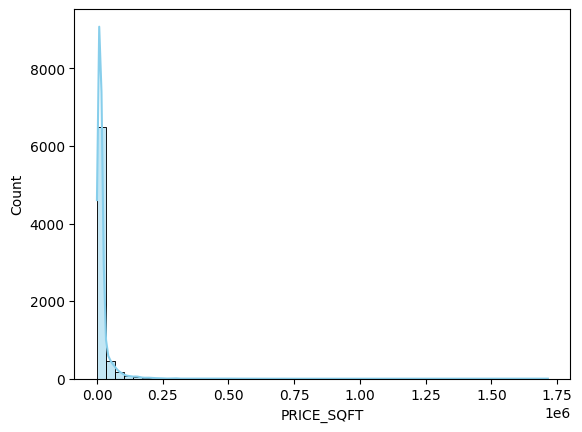

In [ ]:
sns.histplot(df["PRICE_SQFT"], bins = 50, color = 'skyblue', kde = True)

In [ ]:
quantiles = df['PRICE_SQFT'].quantile([0.01, 0.05, 0.75, 0.80,0.90, 0.95, 0.99])
quantiles

0     2695
0     4400
1    16290
1    19134
1    41666
1    71107
1   188834
Name: PRICE_SQFT, dtype: float64

The data is highly right skewed.
90% properties have a price sqft ranging between 0 to 41000 per sqft.

<Axes: >

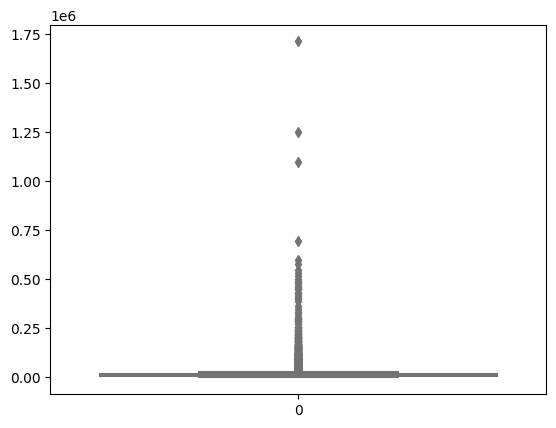

In [ ]:
sns.boxplot(df['PRICE_SQFT'], color='lightgreen')

The box plot shows that data has so many outliers.

**Observation**
* Right skewed
* Potential outliers

# Bedroom

In [ ]:
df["BEDROOM_NUM"].isnull().sum()

0

<Axes: >

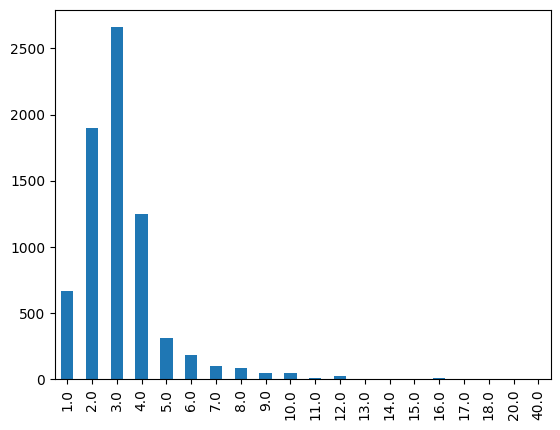

In [ ]:
df["BEDROOM_NUM"].value_counts().sort_index().plot(kind = 'bar')

# BATHROOM

In [ ]:
df["BATHROOM_NUM"].isnull().sum()

0

<Axes: >

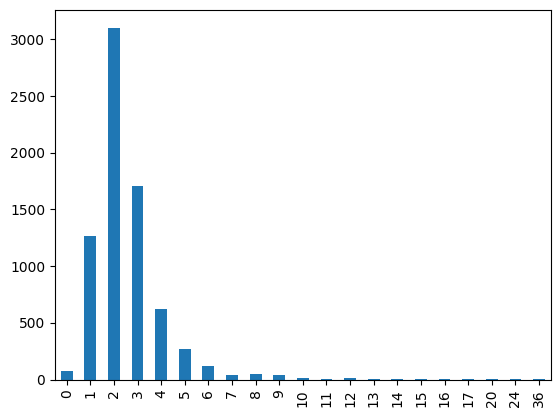

In [ ]:
df["BATHROOM_NUM"].value_counts().sort_index().plot(kind = 'bar')

# Balcony

In [ ]:
df["BALCONY_NUM"].isnull().sum()

190

<Axes: >

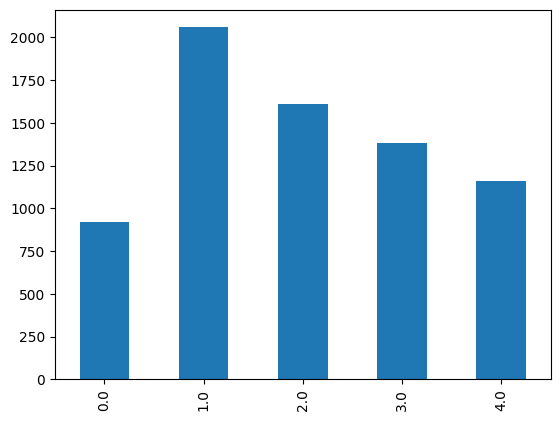

In [ ]:
df["BALCONY_NUM"].value_counts().sort_index().plot(kind = 'bar')

In [ ]:
df.columns

Index(['PROP_ID', 'PROPERTY_TYPE', 'CITY_NAME', 'LOCALITY_NAME', 'OWNTYPE',
       'BEDROOM_NUM', 'BATHROOM_NUM', 'BALCONY_NUM', 'BUILTUP_SQFT',
       'CARPET_SQFT', 'SUPERBUILTUP_SQFT', 'FURNISH', 'FACING', 'FLOOR_NUM',
       'TOTAL_FLOOR', 'LATITUDE', 'LONGITUDE', 'AVAILABILITY', 'AVG_PRICE',
       'PRICE_SQFT', 'AVG_PRICE_CR', 'AREA_SQFT', 'AGE_POSSESSION',
       'AMENITIES_CLUSTER', 'LUXURY_SCORE', 'PROP_NAME'],
      dtype='object')

# Floor num and Total Floors

In [ ]:
flats_df = df[df["PROPERTY_TYPE"] == "flat"]

In [ ]:
houses_df = df[df["PROPERTY_TYPE"] == "house"]

In [ ]:
houses_df.shape

(2412, 24)

In [ ]:
houses_df["FLOOR_NUM"].isnull().sum()

2412

Note: for houses floor num will be null

In [ ]:
df["FLOOR_NUM"].describe()

count   4910
mean       3
std        3
min       -1
25%        1
50%        2
75%        4
max       34
Name: FLOOR_NUM, dtype: float64

<Axes: >

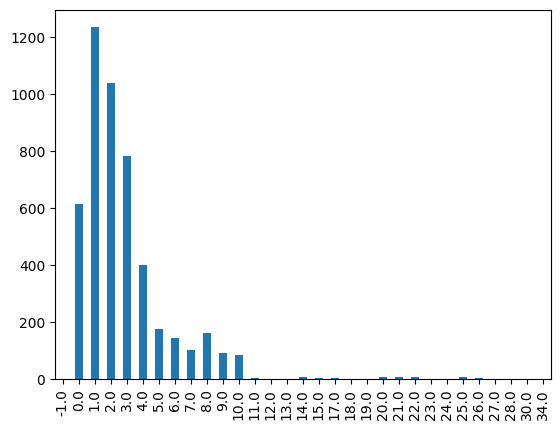

In [ ]:
df["FLOOR_NUM"].value_counts().sort_index().plot(kind = "bar")

<Axes: >

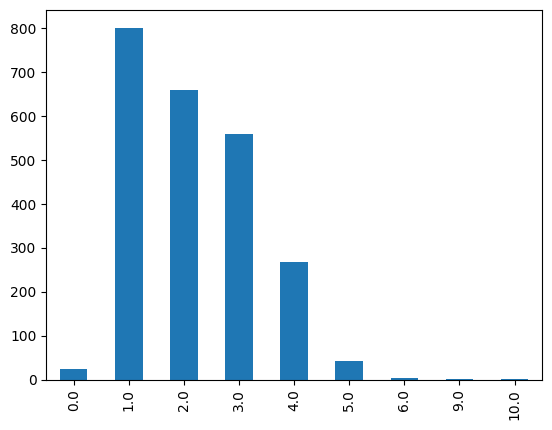

In [ ]:
# Total floors
houses_df["TOTAL_FLOOR"].value_counts().sort_index().plot(kind = 'bar')

<Axes: >

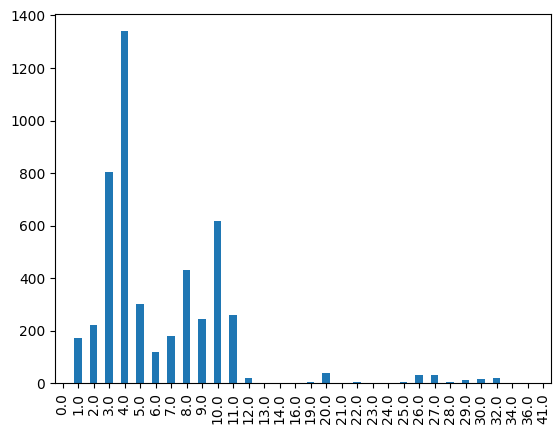

In [ ]:
flats_df["TOTAL_FLOOR"].value_counts().sort_index().plot(kind = 'bar')

In [ ]:
# total floors in houses are ranging from 0-5 floors (as expected nothing new)
# total floors in flats are ranging from  1 to 32. In most cases the total floors are between 1 to 11

# Areas
---

In [ ]:
house_df = df[df["PROPERTY_TYPE"] == "house"]
flat_df = df[df["PROPERTY_TYPE"] == "flat"]

<Axes: xlabel='CALCULATED_AREA_SQFT', ylabel='Count'>

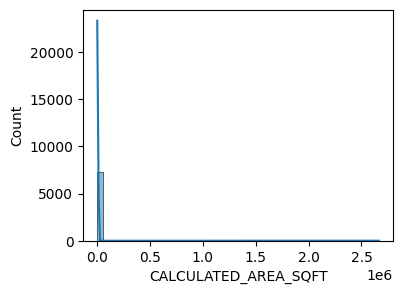

In [ ]:
plt.figure(figsize = (4,3))
sns.histplot(df['CALCULATED_AREA_SQFT'], kde=True, bins = 50)

<Axes: xlabel='CALCULATED_AREA_SQFT', ylabel='Count'>

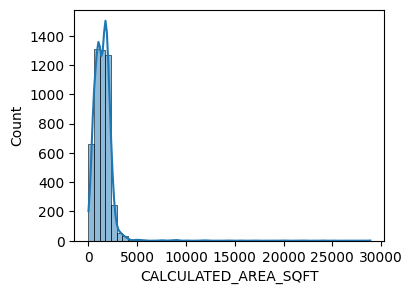

In [ ]:
plt.figure(figsize = (4,3))
sns.histplot(flat_df['CALCULATED_AREA_SQFT'], kde=True, bins = 50)

<Axes: xlabel='CALCULATED_AREA_SQFT', ylabel='Count'>

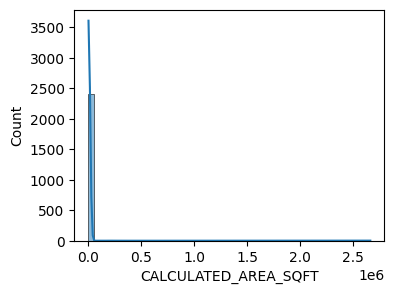

In [ ]:
plt.figure(figsize = (4,3))
sns.histplot(house_df['CALCULATED_AREA_SQFT'], kde=True, bins = 50)

<Axes: >

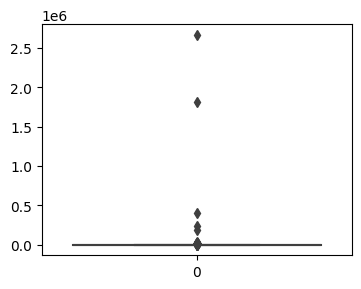

In [ ]:
plt.figure(figsize = (4,3))
sns.boxplot(df['CALCULATED_AREA_SQFT'])

<Axes: >

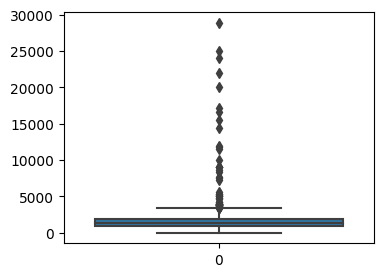

In [ ]:
plt.figure(figsize = (4,3))
sns.boxplot(flat_df['CALCULATED_AREA_SQFT'])

In [ ]:
house_df.head()

,PROP_ID,PROPERTY_TYPE,CITY_NAME,LOCALITY_NAME,OWNTYPE,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,FURNISH,FACING,FLOOR_NUM,TOTAL_FLOOR,LATITUDE,LONGITUDE,AVAILABILITY,AVG_PRICE,PRICE_SQFT,AVG_PRICE_CR,AREA_SQFT,CALCULATED_AREA_SQFT,AGE_POSSESSION,AMENITIES_CLUSTER,LUXURY_SCORE,PROP_NAME
4915,W71346140,house,East Delhi,Nirman Vihar,Freehold,20,20,4,Unfurnished,NA,NaN,4,29,77,Under Construction,160000000,44668,16,3582,3582,Under Construction,Moderate,32,independent
4916,H69351912,house,West Delhi,Meera Bagh,Freehold,5,5,1,NaN,North,NaN,1,29,77,Ready to move,180000000,50000,18,3600,3600,Old Property,Basic,37,independent
4917,Q66075034,house,Central Delhi,Babar Road,Freehold,9,9,2,Unfurnished,North-East,NaN,3,29,77,Ready to move,260000000,42857,26,6067,6067,Old Property,Basic,35,independent
4918,N70679292,house,North Delhi,Civil Lines,Freehold,5,5,4,Unfurnished,East,NaN,NaN,29,77,Ready to move,195000000,39039,20,4995,4995,Relatively New,Basic,17,independent
4919,R69761360,house,East Delhi,Naveen Shahdara,Freehold,4,6,2,Semifurnished,South,NaN,3,29,77,Ready to move,13500000,37037,1,365,365,Relatively New,Basic,10,independent


Highly skewed data.

In [ ]:
index_val = df[df["CALCULATED_AREA_SQFT"] == 0].index

In [ ]:
df.loc[index_val, "CALCULATED_AREA_SQFT"] = df["AREA_SQFT"]

In [ ]:
df["CALCULATED_AREA_SQFT"].describe()

count      7327
mean       2178
std       38128
min          22
25%         667
50%        1200
75%        1800
max     2666667
Name: CALCULATED_AREA_SQFT, dtype: float64

In [ ]:
quantiles = df["CALCULATED_AREA_SQFT"].quantile([0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.99])
quantiles

0     50
0    195
0    392
0    667
0   1200
1   1800
1   2301
1   9000
Name: CALCULATED_AREA_SQFT, dtype: float64

In [ ]:
df[df["CALCULATED_AREA_SQFT"] > 9000][["PROPERTY_TYPE", "CALCULATED_AREA_SQFT", "PRICE_SQFT"]]

In [ ]:
df[df["CALCULATED_AREA_SQFT"] > 9000].shape

(65, 24)

There are 65 properties whose area is greater that 9000 sqft. In these properties there are some properties whose price per sqft is as low as 3 Rs which clearly seems to be data error.

In [ ]:
df[df["CALCULATED_AREA_SQFT"] < 200].shape

(372, 24)

In [ ]:
df[df["CALCULATED_AREA_SQFT"] < 200][["PROP_ID", "PROPERTY_TYPE", "CALCULATED_AREA_SQFT", "PRICE_SQFT"]]

There are 372 properties whose area is less than 200 sqft. By observing their price_sqft, it seems that these properties are data errors because the price/sqft is very high for such samll area.

# Luxury Score

In [ ]:
df["LUXURY_SCORE"].isnull().sum()

0

In [ ]:
df[df["LUXURY_SCORE"] != 0][["LUXURY_SCORE"]].describe()

,LUXURY_SCORE
count,4991
mean,46
std,35
min,3
25%,18
50%,37
75%,64
max,169


I removed 0, because it was used to fill up the null values in the AMENITIES column.

<Axes: ylabel='Count'>

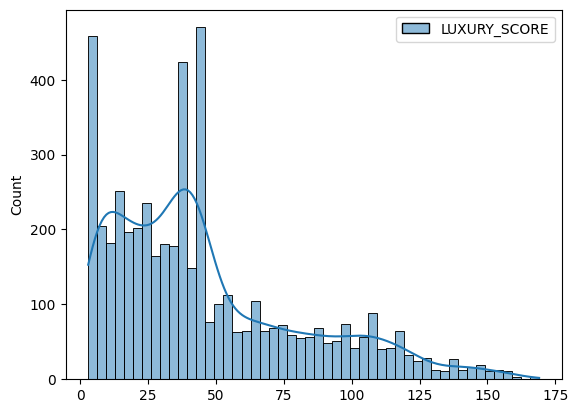

In [ ]:
sns.histplot(df[df["LUXURY_SCORE"] != 0][["LUXURY_SCORE"]], bins=50, color='skyblue', kde=True)

<Axes: >

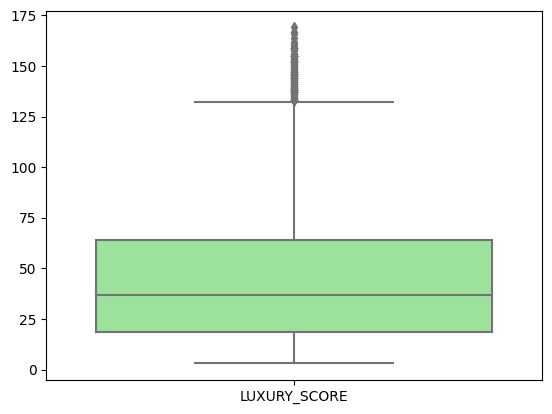

In [ ]:
sns.boxplot(df[df["LUXURY_SCORE"] != 0][["LUXURY_SCORE"]], color='lightgreen')

In [ ]:
df.rename(columns = {"AVG_PRICE": "PRICE", "AVG_PRICE_CR": "PRICE_CR"}, inplace = True)

In [ ]:
df.columns

Index(['PROP_ID', 'PROPERTY_TYPE', 'CITY_NAME', 'LOCALITY_NAME', 'OWNTYPE',
       'BEDROOM_NUM', 'BATHROOM_NUM', 'BALCONY_NUM', 'FURNISH', 'FACING',
       'FLOOR_NUM', 'TOTAL_FLOOR', 'LATITUDE', 'LONGITUDE', 'AVAILABILITY',
       'PRICE', 'PRICE_SQFT', 'PRICE_CR', 'AREA_SQFT', 'CALCULATED_AREA_SQFT',
       'AGE_POSSESSION', 'AMENITIES_CLUSTER', 'LUXURY_SCORE', 'PROP_NAME'],
      dtype='object')

In [ ]:
df.to_csv("flat_houses_v4.csv", index = False)

# Pandas Profiling Report

In [ ]:
!pip install pandas_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 22.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=b9d79a65b08e8a6684bdd8dda26fde1f5b1278d18552e616b25d8fcde59be08a
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title = 'Pandas Profiling Report', explorative = True)
# Generate the report
profile.to_file("output_report.html")

<ipython-input-100-a672f997ac98>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]